### 1. Python实现线性回归

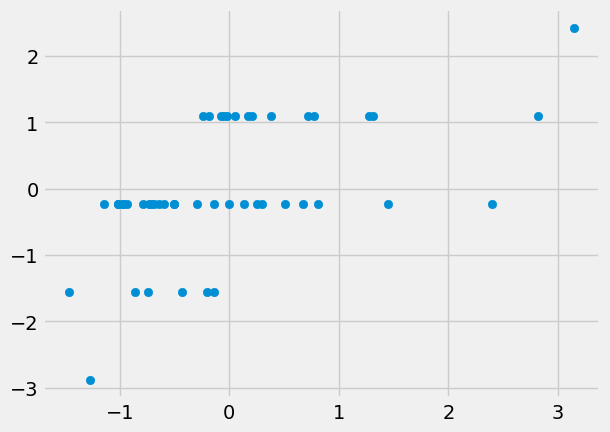

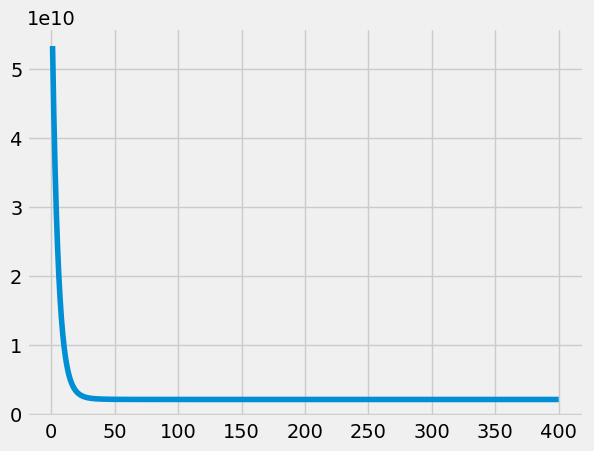

[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

data = np.loadtxt('./1_linear_regression/linear_reg_new/data.txt', delimiter=',', dtype=np.float64)
X = data[:, :-1]
y = data[:, -1]
m = len(y)  # 样本的数量 m
col = data.shape[1]  # data的列数(X和y)
X, mu, sigma = feature_normaliza(X)  # 对X进行归一化处理
plotX1X2(X)
X0 = np.ones((m, 1))
X = np.hstack((X0, X))
theta = np.zeros((col, 1))
y = y.reshape(-1, 1)
alpha = 0.1
num_iters = 400
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
plotJ(J_history, num_iters)
print(theta)



In [3]:
def feature_normaliza(X):
    mu = np.mean(X, axis=0)  # 每一列平均值
    sigma = np.std(X, axis=0)  # 每一列标准差
    X = (X-mu)/sigma
    return X, mu, sigma


In [38]:
def plotX1X2(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()


In [19]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    n = len(theta)
    temp = np.matrix(np.zeros((n, num_iters)))
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        h = np.dot(X, theta)  # hypotheis
        temp[:, i] = theta - (alpha / m) * (np.dot(X.T, h - y))
        theta = temp[:, i]
        J_history[i] = computerCost(X, y, theta)
    return theta, J_history


In [9]:
def computerCost(X, y, theta):
    m = len(y)
    J = 0
    
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m) #计算代价J
    return J


In [46]:
def plotJ(J_history, num_iters):
    x = np.arange(1, num_iters+1)
    plt.plot(x, J_history)
    plt.show()

### 2. scikit learn实现线性回归

#### 1. 单变量

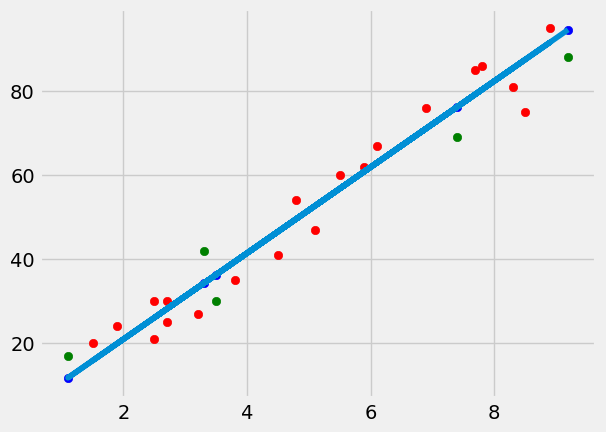

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv('./1_linear_regression/linear_regression_sklearn/studentscores.csv')
X = dataset['Hours'].values.reshape(-1, 1)
y = dataset['Scores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred2 = regressor.predict(X_train)

plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_pred, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.plot(np.vstack((X_train, X_test)), np.hstack((y_pred2, y_pred)))


#### 2. 多变量

In [147]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('1_linear_regression/linear_reg_new/data.txt')
X = df.iloc[:, :2].values.astype(np.float64)
y = df.iloc[:, -1].values.astype(np.float64)

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# y_pred, y_test
y_pred-y_test


array([ 78180.10514042, -33830.49863737,  60021.21426417,  94886.59586931,
       116226.89549602])